<h2>Imports</h2>

In [22]:
from pymatgen.core import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt 
import numpy as np
from pymatgen.phonon import plotter
from pymatgen.phonon import bandstructure
from pymatgen.phonon.plotter import PhononBSPlotter
from math import pi,fabs

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) #Pour éviter un avertissement 
with MPRester("toW9wacOwhTywK26") as m:
    # Structure for material id
    struct = m.get_structure_by_material_id("mp-15724")
    phonons = m.get_phonon_bandstructure_by_material_id("mp-15724")

<h2>Structure de bande de phonons</h2>

Structure de bande de phonons :


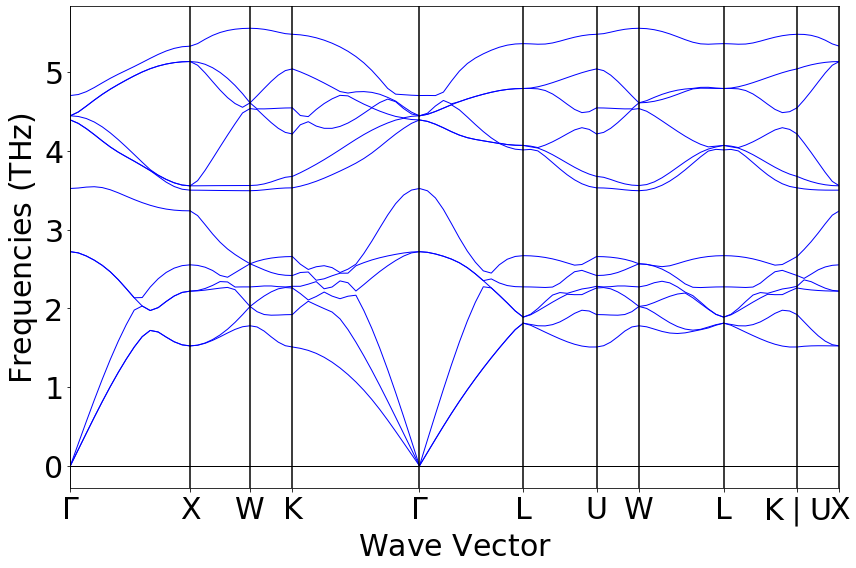


Zone de Brillouin où nous allons étudier les phonons :


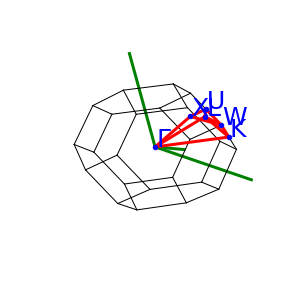

In [23]:
print("Structure de bande de phonons :")
bsplotter = PhononBSPlotter(phonons)
bsplotter.show()


# Zone de Brillouin
print("\nZone de Brillouin où nous allons étudier les phonons :")
bsplotter.plot_brillouin()

<h2>Vitesse du son</h2>

Initialisation des données :

In [24]:
data = bsplotter.bs_plot_data()
distances   = data.get("distances")
frequ = data.get("frequency")
directions  = data.get('ticks').get('label')

Analyse :

In [25]:
# 3 distances
q1 = distances[0]
q2 = distances[3]
q3 = distances[4]

# fréquences de ces distances
freq1 = frequ[0][0]
freq2 = frequ[3][1]
freq3 = frequ[4][2]
    
# Pente pour la premiere branche
x1 = np.array([q1[0],q1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)
a1 = np.linspace(q1[0],q1[-1],1000)
d1 =coef1[0]*a1+coef1[1]

# Pente pour la deuxieme branche
x2 = np.array([q2[-1],q2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)
a2 = np.linspace(q2[0],q2[-1],1000)
d2 =coef2[0]*a2+coef2[1]

# Pente pour la troisieme branche
x3 = np.array([q3[0],q3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)
a3 = np.linspace(q3[0],q3[-1],1000)
d3 =coef3[0]*a3+coef3[1]

#facteur correctif (Angstrom en m et THz en Hz)
fact = 100
print("La vitesse du son de la branche acoustique 1", "selon la direction \u0393 - X est de ", 2*pi*fabs(coef1[0])*fact, " [m/s].")
print("La vitesse du son de la branche acoustique 2", "selon la direction K - \u0393 est de ", 2*pi*fabs(coef2[0])*fact, "[m/s].")
print("La vitesse du son de la branche acoustique 3", "selon la direction \u0393 - L est de ", 2*pi*fabs(coef3[0])*fact, "[m/s].")


La vitesse du son de la branche acoustique 1 selon la direction Γ - X est de  2386.584721942707  [m/s].
La vitesse du son de la branche acoustique 2 selon la direction K - Γ est de  2388.1396413912116 [m/s].
La vitesse du son de la branche acoustique 3 selon la direction Γ - L est de  3788.4711676018005 [m/s].


<h2>Graphique</h2>

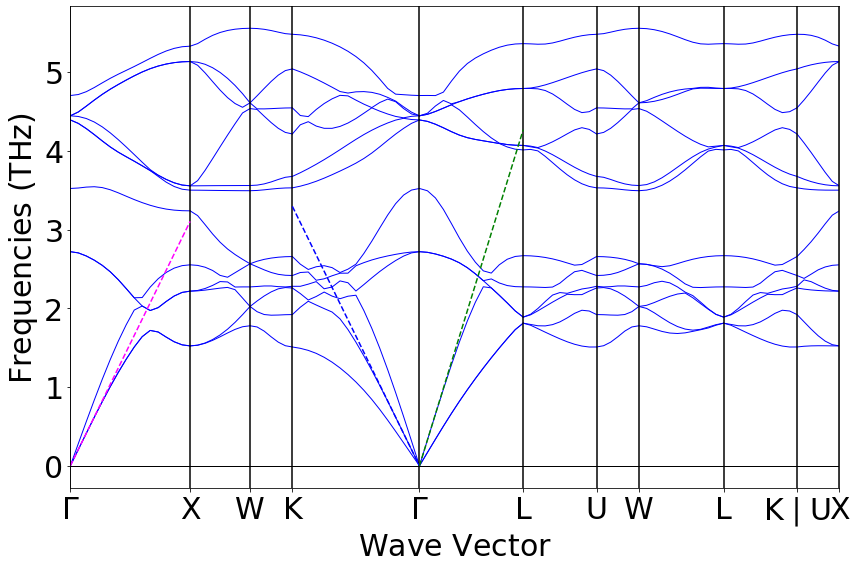

Représentée en magenta ci-dessus, la vitesse du son dans la direction Gamma-X
Représentée en bleu ci-dessus, la vitesse du son dans la direction Gamma-K
Représentée en vert ci-dessus, la vitesse du son dans la direction Gamma-L


In [26]:
# Graphique
bsplotter.get_plot()
plt.plot(a1,d1,color='magenta',ls='--')
plt.plot(a2,d2,color='b',ls='--')
plt.plot(a3,d3,color='g',ls='--')
plt.show()

print("Représentée en magenta ci-dessus, la vitesse du son dans la direction Gamma-X")
print("Représentée en bleu ci-dessus, la vitesse du son dans la direction Gamma-K")
print("Représentée en vert ci-dessus, la vitesse du son dans la direction Gamma-L")